
### WeedCrop Image detection - YOLOv5s
This project uses various CNN techniques to classify weed and normal crops

In [1]:
# importing necessary libraries
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

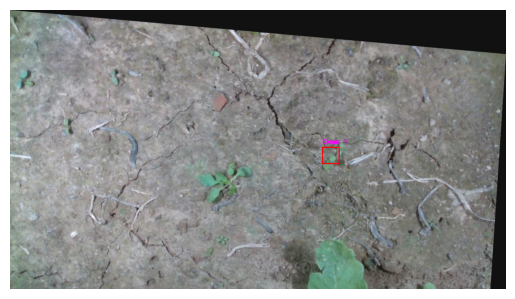

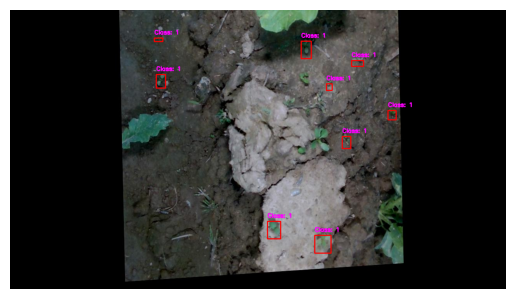

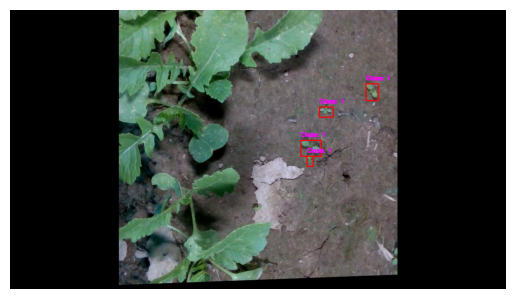

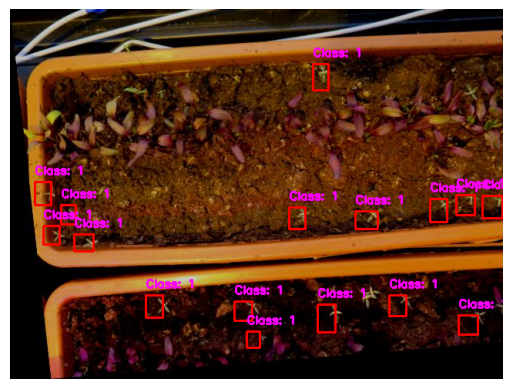

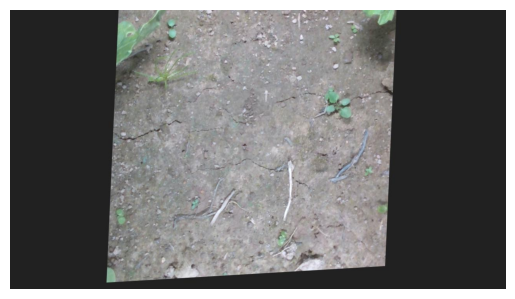

In [35]:
#visualising the dataset
import os
import cv2
import matplotlib.pyplot as plt
import glob
import random

# Path to the folder containing your YOLOv5 dataset images
image_folder = './WeedCrop/train/images'
label_folder = './WeedCrop/train/labels'

# List all image files in the image folder
image_files = glob.glob(os.path.join(image_folder, '*.jpg')) + glob.glob(os.path.join(image_folder, '*.png'))

# Display some random images from the dataset
num_images_to_display = 5
selected_images = random.sample(image_files, num_images_to_display)

# Function to display images with bounding boxes and annotations
def display_image_with_boxes(image_path, label_folder):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get the corresponding annotation file path
    label_path = os.path.join(label_folder, os.path.splitext(os.path.basename(image_path))[0] + '.txt')

    # Read the annotation file
    with open(label_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        # Parse YOLOv5 annotation format (class_id, x_center, y_center, width, height)
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        
        # Convert YOLOv5 format to OpenCV format (x, y, x+w, y+h)
        x, y, w, h = int((x_center - width / 2) * image.shape[1]), int((y_center - height / 2) * image.shape[0]), int(width * image.shape[1]), int(height * image.shape[0])

        # Draw bounding box
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Display annotations
        cv2.putText(image_rgb, f'Class: {int(class_id)}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)

    # Display the image with bounding boxes and annotations
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Display images with bounding boxes and annotations
for image_path in selected_images:
    display_image_with_boxes(image_path, label_folder)


### Load model

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

In [ ]:
# install dependencies as necessary
!pip install -r requirements.txt  # install dependencies 

In [2]:
#Load the model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\AryanK/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-1-24 Python-3.10.8 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Initial detection

In [4]:
image = 'https://ultralytics.com/images/zidane.jpg'

In [5]:
result = model(image)
result.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1030.1ms pre-process, 314.8ms inference, 34.0ms NMS per image at shape (1, 3, 384, 640)


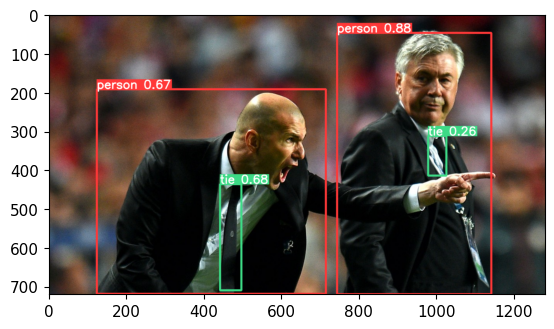

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

### Training on Custom dataset

In [12]:
# use comet_ml for easy visualization
import os

# Set the Comet API key
os.environ['COMET_API_KEY'] = 'your own api key'


In [14]:
#training model
#refer the yolov5_dataaset.yaml file , for configuring your own yaml file
!cd yolov5 && python train.py --img 512 --batch 4 --epochs 25 --data yolov5_dataset.yaml --weights yolov5s.pt --device 0 

train: weights=yolov5s.pt, cfg=, data=yolov5_dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=25, batch_size=4, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'D:\Deep': No such file or directory
YOLOv5  2024-1-24 Python-3.10.8 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs

### Training results

In [28]:
import pandas as pd

# Replace 'your_excel_file.xlsx' with the actual path to your Excel file
excel_file_path = './images/results.csv'

# Read the Excel file into a pandas DataFrame
df = pd.read_csv(excel_file_path)

# Display the DataFrame as a table
df


epoch        train/box_loss        train/obj_loss  \
0                      0              0.098924              0.028175   
1                      1              0.072172              0.028254   
2                      2              0.068269              0.028199   
3                      3              0.066296              0.028543   
4                      4              0.062918              0.028465   
5                      5              0.062130              0.028043   
6                      6              0.059521              0.027692   
7                      7              0.057299              0.027915   
8                      8              0.056274              0.028219   
9                      9              0.054369              0.027776   
10                    10              0.054325              0.027182   
11                    11              0.052721              0.027235   
12                    12              0.051715              0.026917   
13                    13              0.049961              0.026969   
14                    14              0.049375              0.027494   
15                    15              0.048153              0.026522   
16                    16              0.047266              0.026438   
17                    17              0.045822              0.026388   
18                    18              0.045483              0.026728   
19                    19              0.045156              0.026093   
20                    20              0.044258              0.025778   
21                    21              0.043136              0.025480   
22                    22              0.043002              0.026245   
23                    23              0.042602              0.025440   
24                    24              0.041278              0.025610   

          train/cls_loss     metrics/precision        metrics/recall  \
0               0.017091               0.62725               0.19897   
1               0.011185               0.67173               0.22497   
2               0.009711               0.64494               0.33571   
3               0.007143               0.45766               0.48669   
4               0.005221               0.44112               0.57542   
5               0.004625               0.50986               0.56785   
6               0.003813               0.55321               0.52737   
7               0.002934               0.55233               0.59171   
8               0.002401               0.56826               0.58354   
9               0.002230               0.58894               0.56920   
10              0.002569               0.62773               0.65542   
11              0.002122               0.58392               0.63143   
12              0.001715               0.58404               0.50443   
13              0.001473               0.61595               0.59040   
14              0.001480               0.58033               0.59065   
15              0.001386               0.57219               0.63126   
16              0.001179               0.63692               0.66493   
17              0.001286               0.65292               0.68922   
18              0.001105               0.64381               0.65103   
19              0.001316               0.64525               0.68611   
20              0.001154               0.65179               0.67525   
21              0.000947               0.72697               0.65404   
22              0.000759               0.72289               0.67799   
23              0.000710               0.71338               0.66256   
24              0.000540               0.72288               0.64144   

         metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
0                0.11843              0.029376              0.060879   
1                0.15680              0.039510              0.051928   
2                0.29317              0.098383           

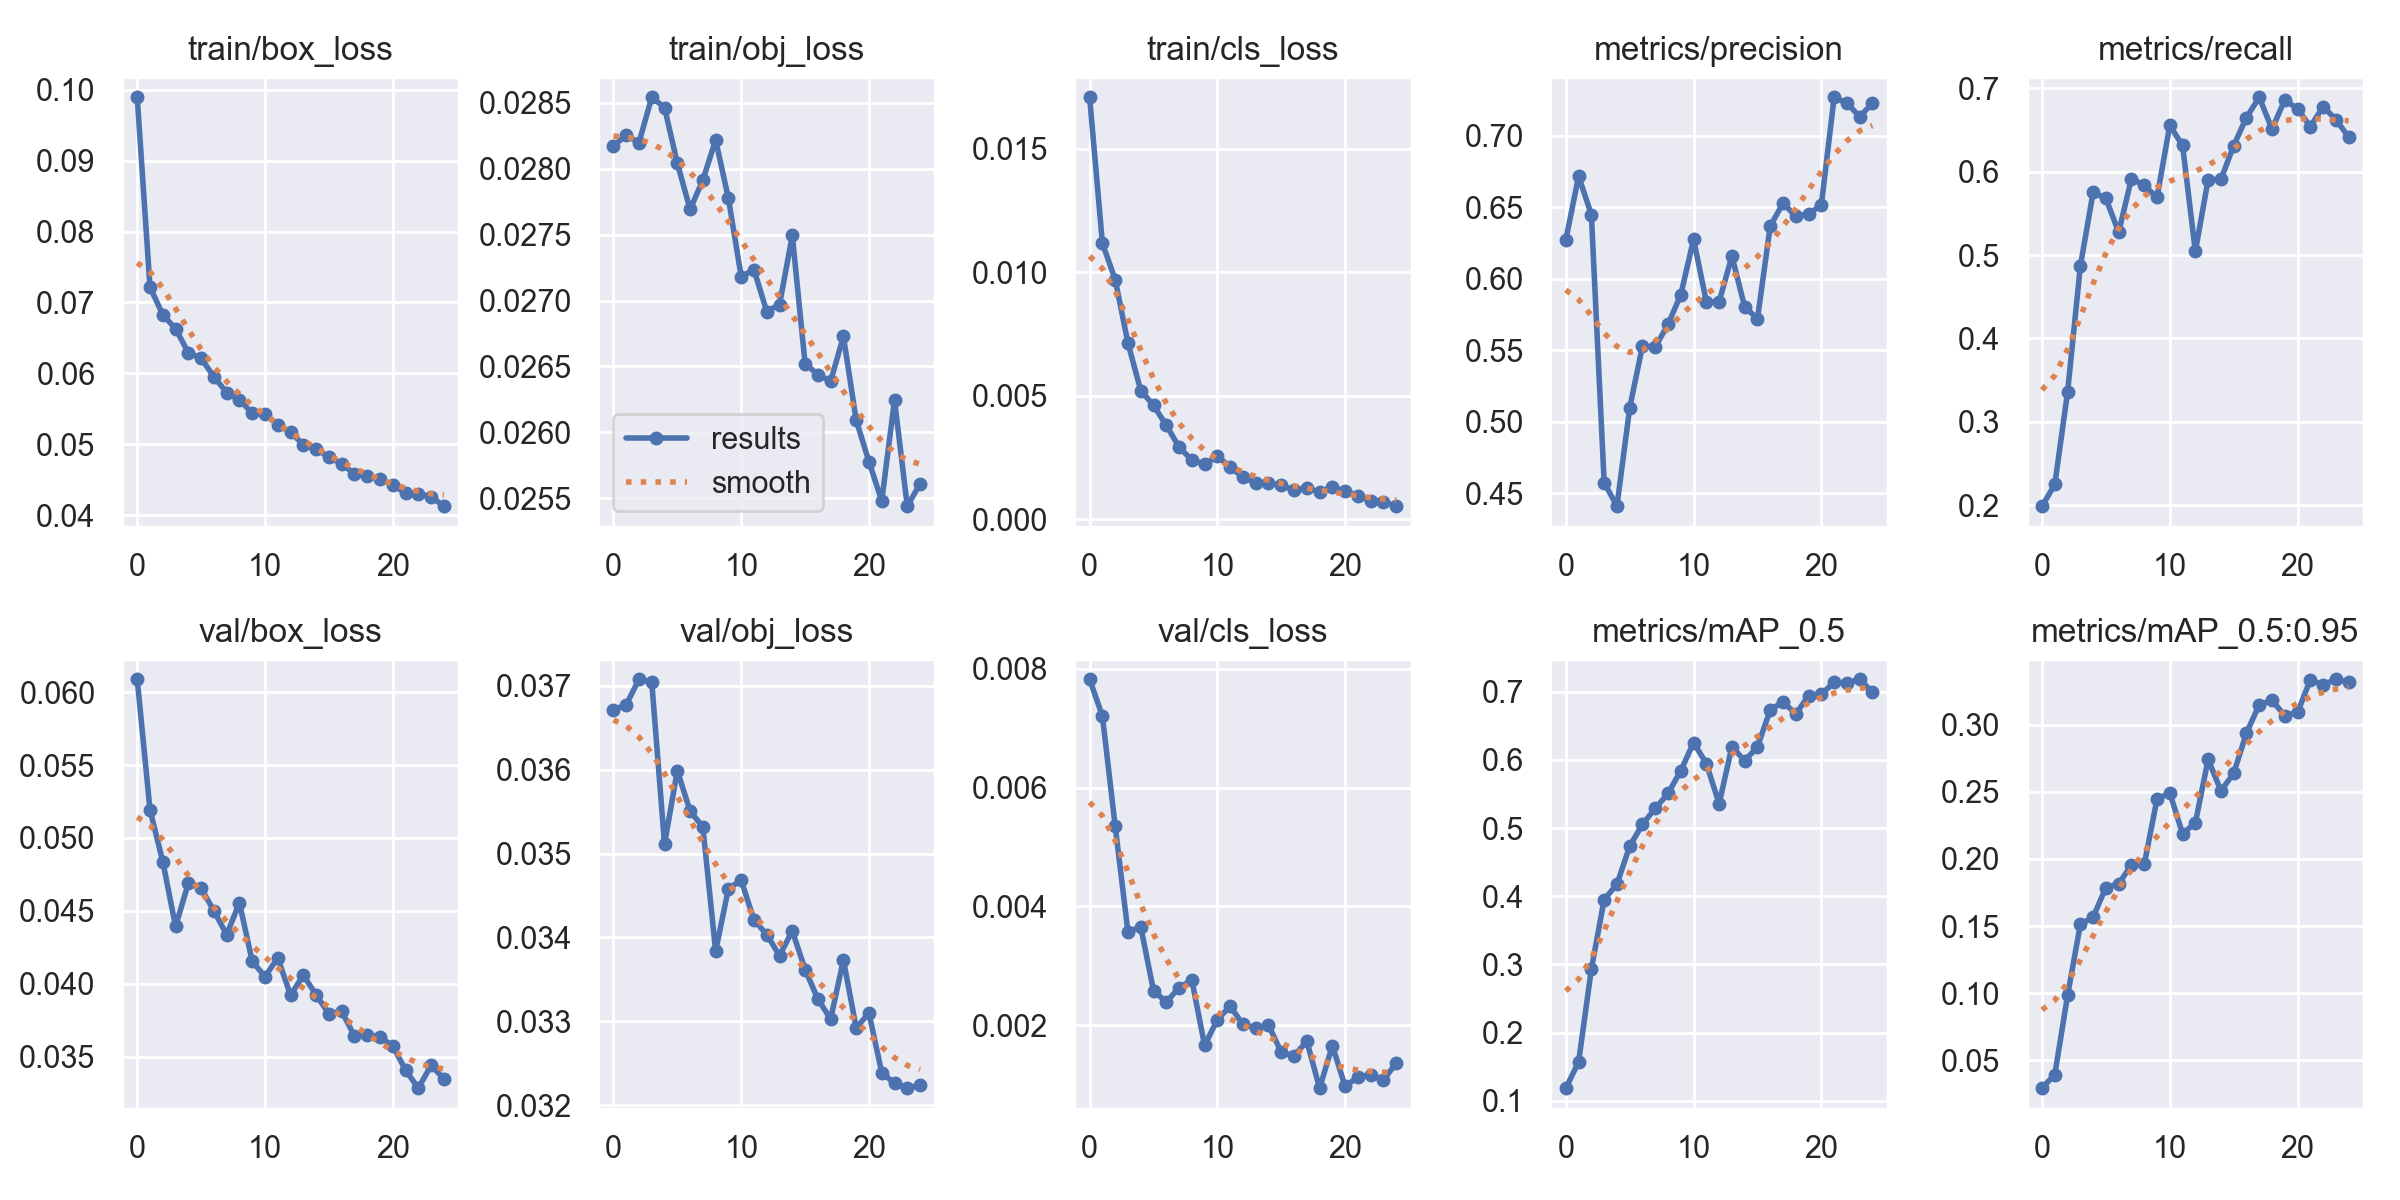

In [27]:
from IPython.display import Image

# Replace 'your_image_path.jpg' with the actual path to your image file
image_path = './images/results.png'

# Display the image
Image(filename=image_path)

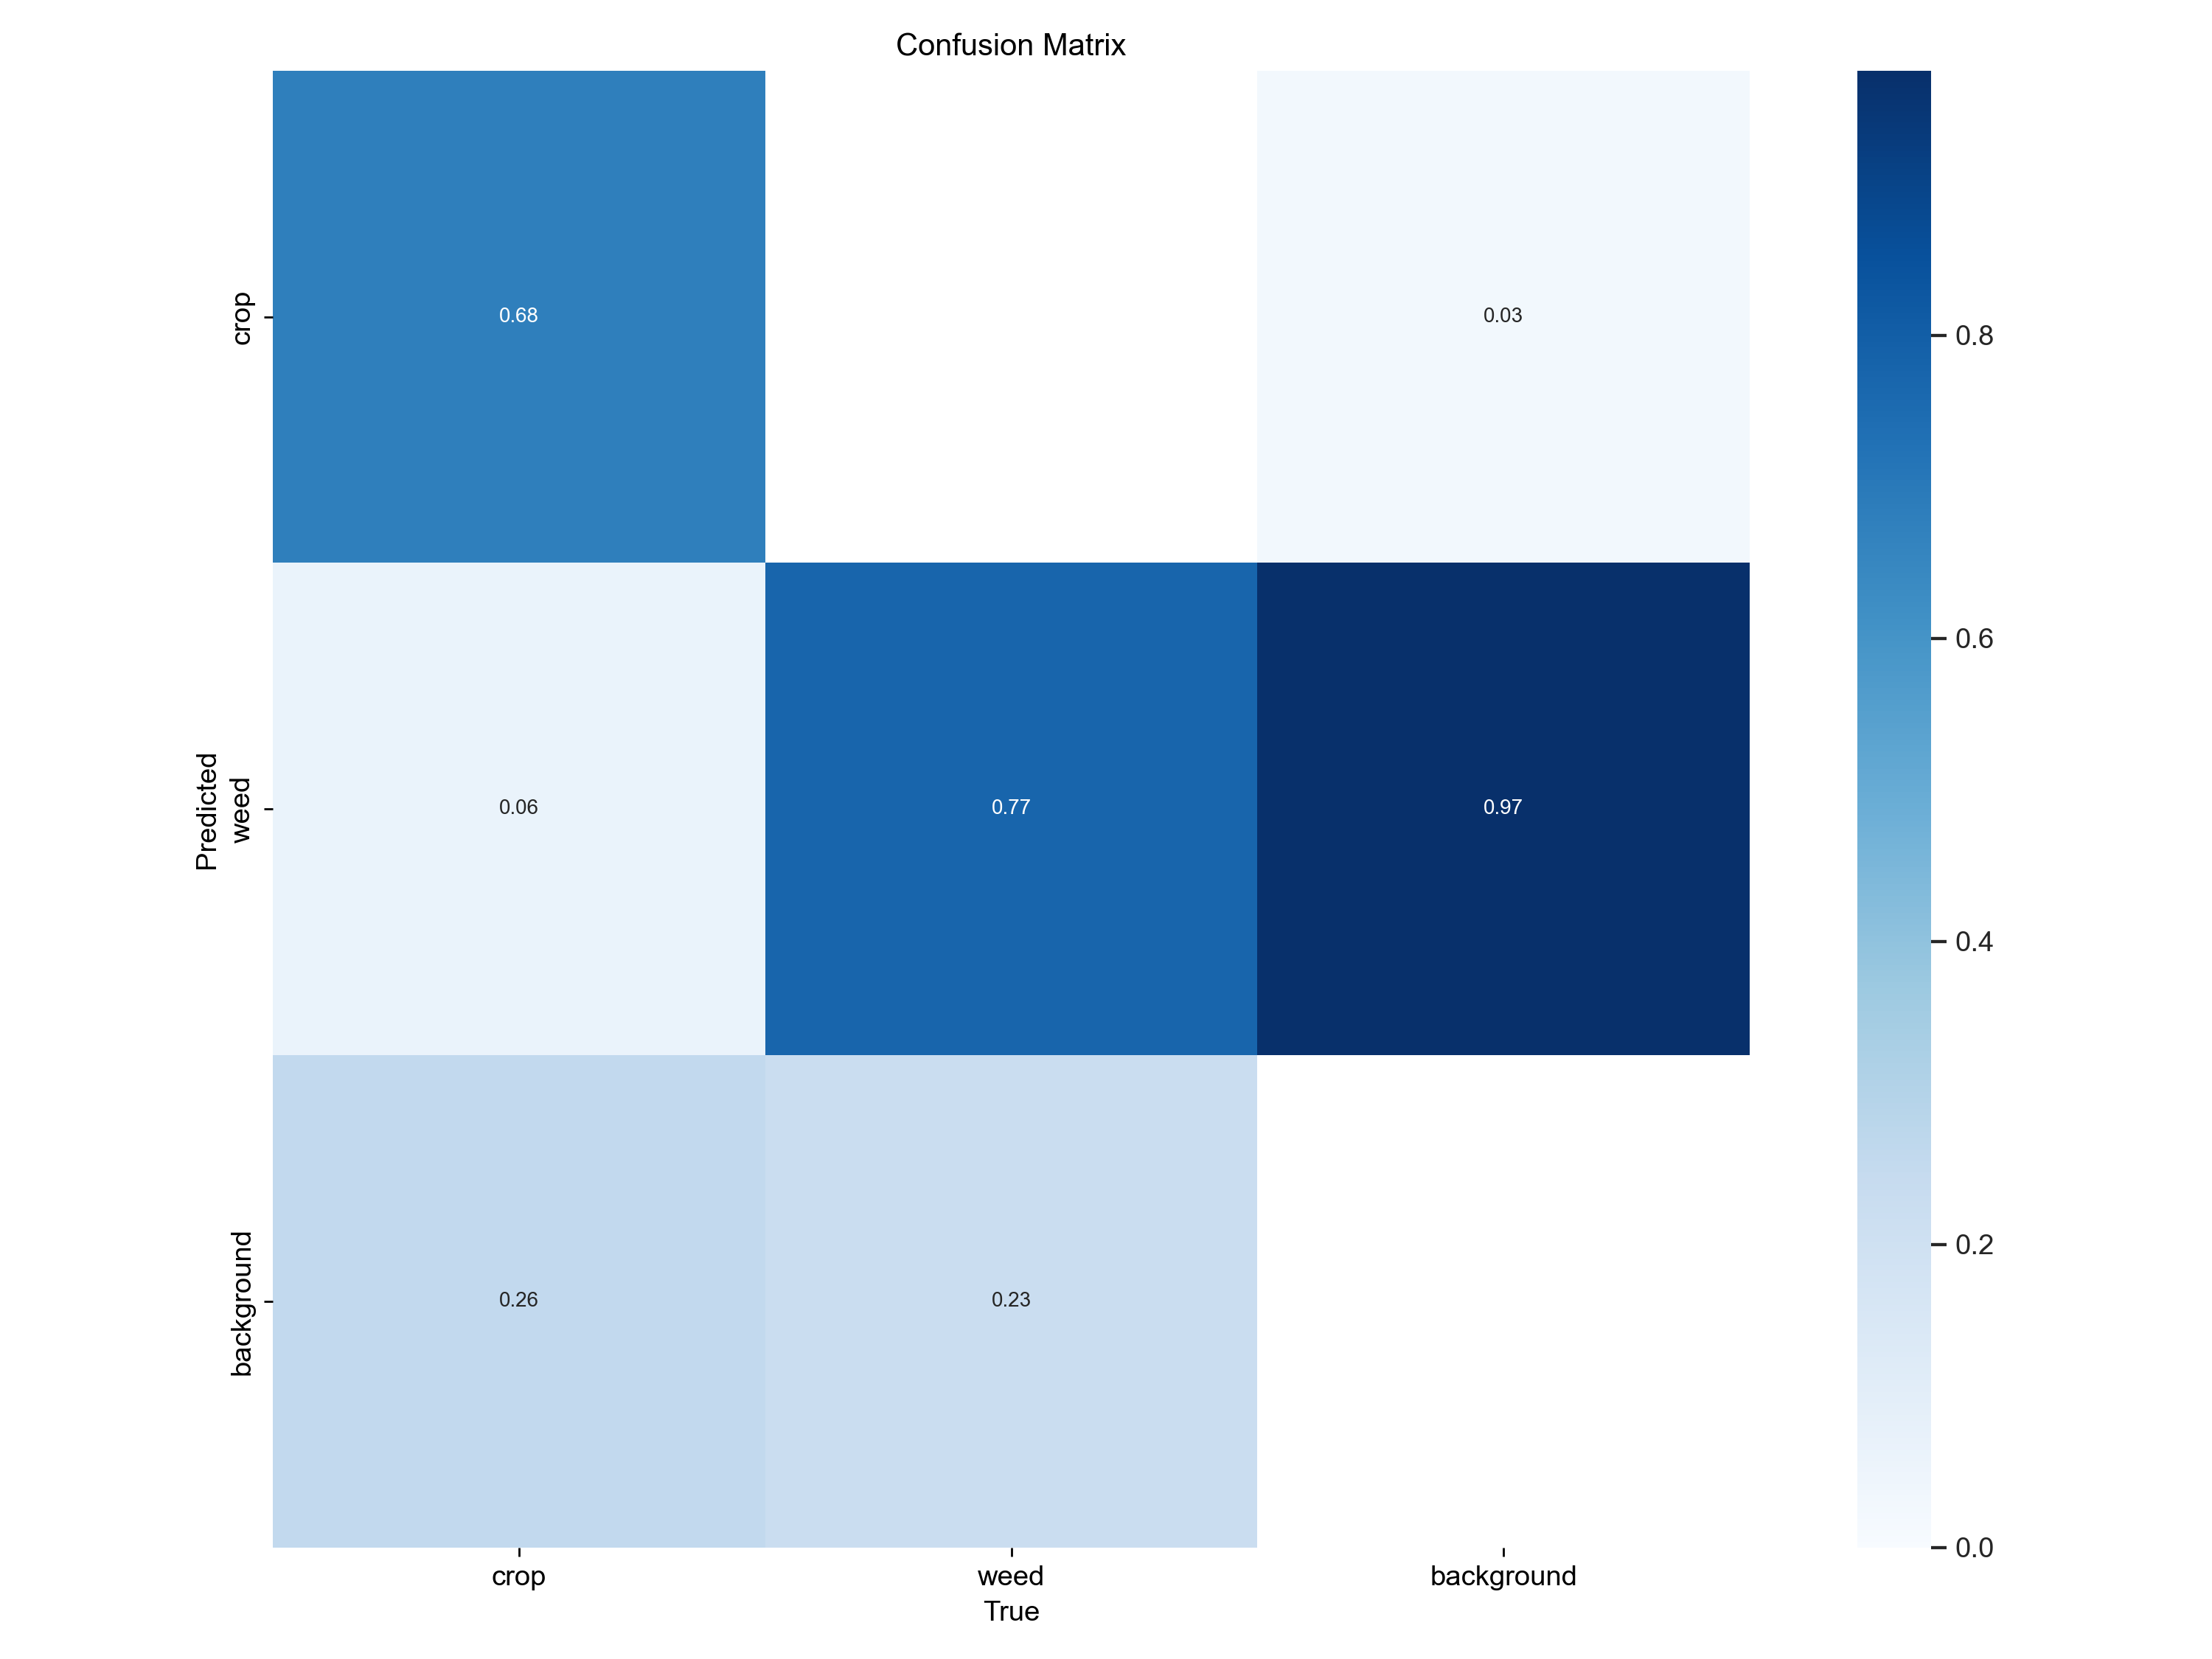

In [37]:
#Confusion matrix
image3 = './images/confusion_matrix.png'
Image(filename=image3, width=800)

### Validation set results


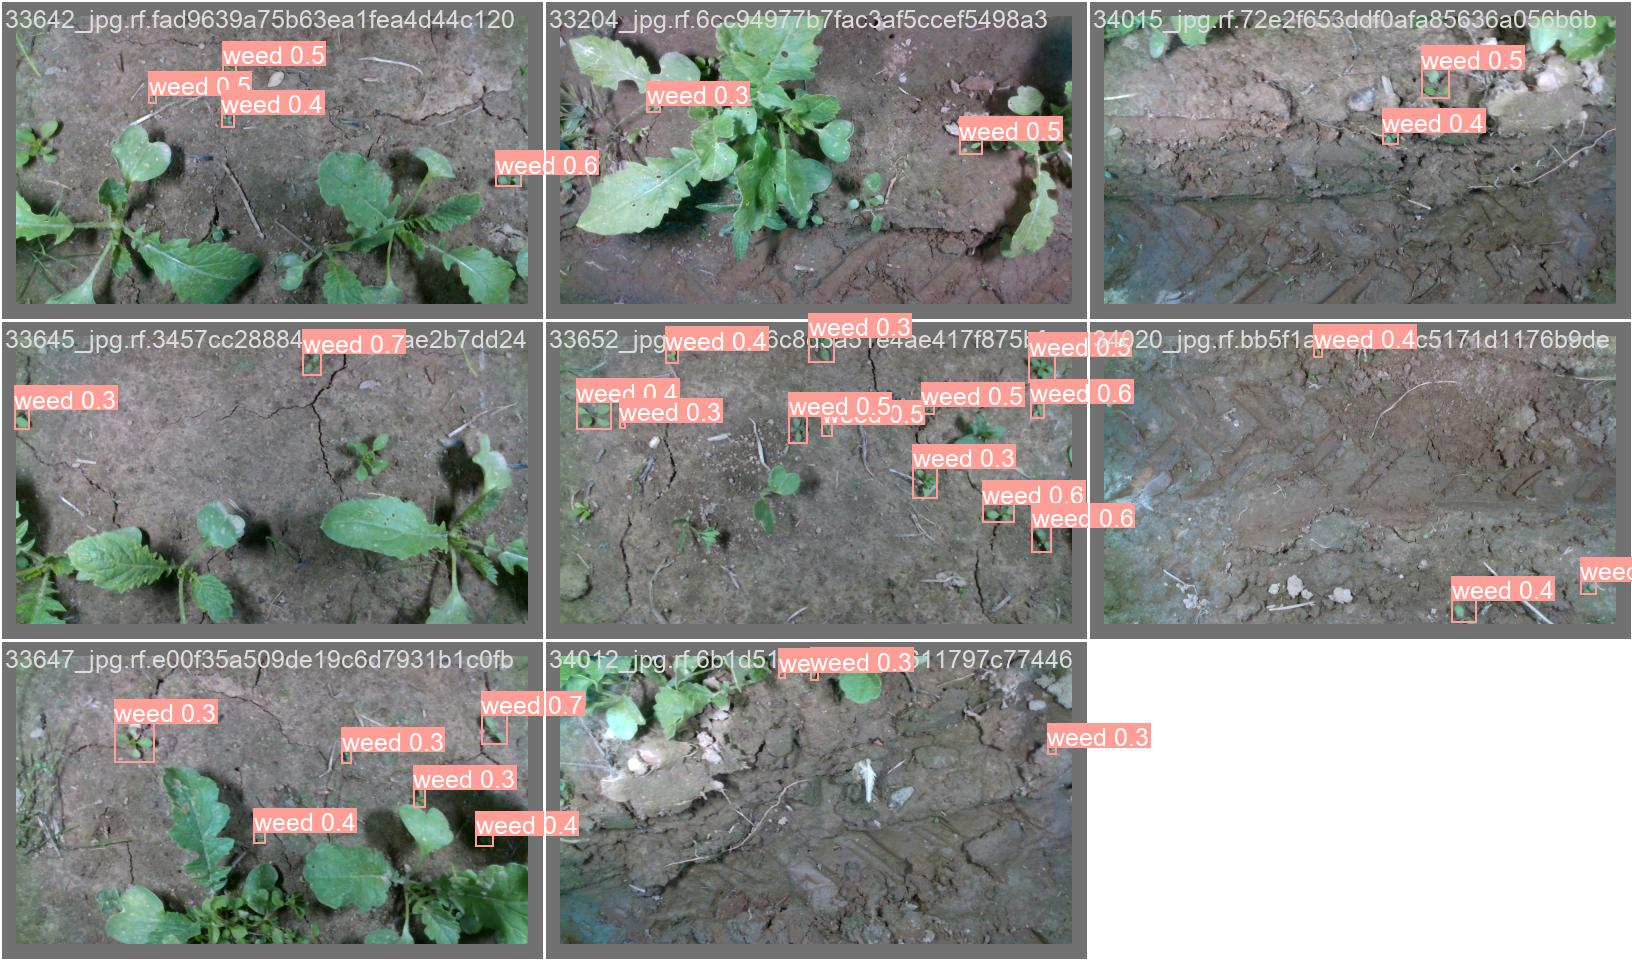

In [31]:
image1 = './images/val_batch1_pred.jpg'
image2 = './images/val_batch2_pred.jpg'

# Display the image
Image(filename=image1)
#Image(filename=image2)